**1. ENTRENAR UNA CONVNET DESDE CERO CON UN CONJUNTO DE DATOS PEQUEÑO**

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_loca_devices())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: No se puede encontrar el módulo especificado.

During handling 

TypeError: can only concatenate str (not "list") to str

In [2]:
from keras import backend as k
k.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\anaca\Anaconda3\envs\PythonGPU\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: No se puede encontrar el módulo especificado.

During handling 

TypeError: can only concatenate str (not "list") to str

Nos centramos en la clasificación de imágenes como perros o gatos, en un conjunto de datos que contiene 4.000 fotografías de gatos y perros ( 2.000 gatos y 2.000 perros ). Vamos a utilizar 2.000 imágenes para el entrenamiento: 1.000 para la validación y 1.000 para la prueba.

Empezaremos con un entrenamiento naive de una convnet con las 2.000 muestras de entrenamiento, con la que conseguiremos una exactitud del 71%. El problema será el sobreajuste. Para ello introduciremos el aumento de datos, una técnica para reducir el sobreajuste en la visión por ordenador. 
Y luego, usaremos 2 técnicas esenciales para aplicar el deeplearning a conjuntos de datos pequeños: la extracción de características con una red preentrenada (exactitud de 90-96%) y el ajuste de una red preentrenada (exactitud de 97%). 

En resumen utilizaremos 3 estrategias:

1- Entrenar un modelo desde cero.

2- Extracción de características en un modelo preentrenado.

3- Ajustar un modelo preentrenado.


**DATOS**
Este conjunto contiene 25000 imágenes de perros y gatos (12.500 de cada clase). Vamos a crear un nuevo conjunto de datos con 3 subconjuntos: un conjunto de entrenamiento con 1.000 muestras de cada clase, un conjunto de validación con 500 muestras de cada clase y un conjunto de prueba con 500 muestras de cada clase.


In [1]:
#Copiar imágenes en directorios de entrenamiento, validación y prueba

import os, shutil

original_dataset_dir = '/Users/anaca/Desktop/gatosyperros/train/' #Ruta donde están los datos iniciales

base_dir = '/Users/anaca/Desktop/gatitosyperritos' #Ruta donde seguardará los conjuntos pequeños que vamos a crear

os.mkdir(base_dir) #crea el directorio de perritos y gatitos


In [2]:
#directorios para divisiones de entrenamiento, validación y prueba.

train_dir = os.path.join(base_dir , 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir , 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir , 'test')
os.mkdir(test_dir)

In [3]:
#Directorio con fotos de gatos (entrenamiento)
train_cats_dir = os.path.join(train_dir , 'cats')
os.mkdir(train_cats_dir)

In [4]:
#Directorio con fotos de perros (entrenamiento)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
#Directorio con fotos de gatos (validación)
validation_cats_dir = os.path.join(validation_dir , 'cats')
os.mkdir(validation_cats_dir)

In [6]:
#Directorio con fotos de perros (validación)
validation_dogs_dir = os.path.join(validation_dir , 'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
#Directorio con fotos de gatos (prueba)
tests_cats_dir = os.path.join(test_dir , 'cats')
os.mkdir(tests_cats_dir)

In [8]:
#Directorio con fotos de perros (prueba)
test_dogs_dir = os.path.join(test_dir , 'dogs')
os.mkdir(test_dogs_dir)

**COPAR IMÁGENES DE GATOS**

In [9]:
#Copia 1000 primeras imágenes de gatos en train_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

In [10]:
#Copia 500 siguientes imágenes de gatos en validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

In [11]:
#Copia 500 siguientes imágenes de gatos en test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(tests_cats_dir, fname)
    shutil.copyfile(src,dst)

**COPIAR IMÁGENES DE PERROS**

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

Para hacer una comprobación preliminar, vamos a contar cuántas imágenes hay en cada división de entrenamiento (entrenamiento/validación/prueba):

In [15]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [16]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [17]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [18]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [19]:
print('total test cat images:', len(os.listdir(tests_cats_dir)))

total test cat images: 500


In [20]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


Tenemos 2000 imágenes de entrenamiento, 1000 imágenes de validación y 1000 imágenes de prueba. Cada división contiene el mismo número de muestras de cada clase: se trata de un problema de clasificación binaria equilibrada, lo que significa que la exactitud de la clasificación será una medida adecuada del éxito.

**CREAR LA RED**

Vamos a utilizar una estructura de pilas de capas Conv2D (con activación relu) y MaxPooling2D alternas.
Como estamos trabajando con imágenes grandes y es un problema complejo, vamos a hacer la red más grande, como consecuencia tendrá una cada Conv2D y una MaxPollin2D más. Esto sirve para aumentar la capacidad de la red como para reducir el tamaño de los mapas de caracteristicas para que no sean excesivamente grandes cuando lleguemos a la cala flatten

Como se trata de un problema de clasificaicon binaria, acabamos la red con una sola unidad (una capa Dense de tamaño 1 ) y una activacion sigmoid. Esta unidad codificará la probabilidad de que la red esté mirando una clase u otra.

**Crear instancias en una convnet pequeña para una clasificación de perros frente a gatos**


In [17]:
import keras

Using TensorFlow backend.


In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

Para compilar vamos a utilizar el optimizador RMSprop. Como hemos acabado la red con una sola unidad sigmoidea, usamos entropóa cruzada binaria com pérdida.

**Configurar el modelo para el entrenamiento**

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Procesamiento de datos**
Los datos se deben formatear para convertilos en tensores en punto flotante preprocesadors antes de introducirlos en la red. En este momento, los datos se encuentran en archivos JPEG, seguimos los siguientes pasos:

1.Leer los archivos de las imágenes.
2.Descodificar el contenido JPEG a cuadrículas de oíxeles RGB.
3.Convertir estas en tensores de punto flotante.
4.Cambiar la escala de los valores de pixel (entre 0-255) al intervalo [0,1] (como ya se sabe, las redes neuronales prefieren trabajar con valores pequeños)

keras nos proporciona la clase **ImageDataGenerator** nos permite configurar con rapidez generadores de Python que pueden convertir de forma automática archivos de imágenes de un disco de lotes de tensores preprocesados. 



**Utilizamos ImageDataGenerator para leer imágenes de directorios**

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #redimensiona las imágenes por 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #directorio objetivo
    target_size=(150,150), #Redimensiona las imágenes a 150x150
    batch_size = 20, 
    class_mode='binary' #Al usar binary_crossentropy loss, necesitamos etiquetas binarias
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Ajustar el modelo utilizando un generador de lotes**

In [21]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 70s 701ms/step - loss: 0.6932 - acc: 0.5350 - val_loss: 0.6737 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 80s 805ms/step - loss: 0.6580 - acc: 0.6065 - val_loss: 0.6489 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 70s 698ms/step - loss: 0.6122 - acc: 0.6650 - val_loss: 0.6389 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 76s 763ms/step - loss: 0.5725 - acc: 0.7010 - val_loss: 0.5412 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 79s 786ms/step - loss: 0.5469 - acc: 0.7155 - val_loss: 0.6012 - val_acc: 0.6670
Epoch 6/30
 13/100 [==>...........................] - ETA: 54s - loss: 0.5063 - acc: 0.7308

KeyboardInterrupt: 

In [22]:
#Guardamos el modelo
model.save('cats_and_dogs_small_1.h5')

Vamos a trazar la pérdida y la exactitud del modelo sobre los datos de entrenamiento y validación durante el entrenamiento.

**Mostrar las curvas de pérdida y de exactitud durante el entrenamiento.**

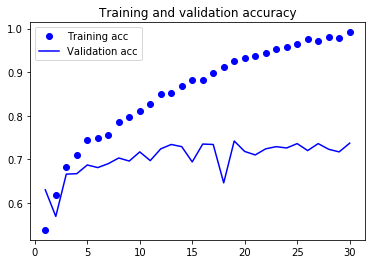

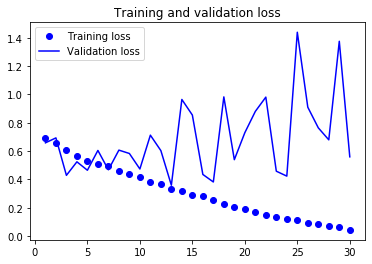

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


En estos gráficos podemos ver claramente un sobreajuste. Para mejorar este sobreajuste utilizaremos el aumento de datos:

**Determinar una configuración de AUMENTO DE DATOS mediante ImageDataGenerator**

In [24]:
datagen = ImageDataGenerator(
    rotation_range = 40, #grados que van a rotar las imagenes de forma aleatoria
    width_shift_range = 0.2 , #fracción que se trasladan las imagenes de forma alearia de ancho
    height_shift_range = 0.2, #fracción que se trasladan las imagenes de forma alearia de alto
    shear_range = 0.2, #aplica de forma aleatoria transformaciones de cizallamiento
    zoom_range = 0.2, #zoom de forma aleatoria
    horizontal_flip = True, #da la vuelta de forma aleatoria a la mitad de las imágenes horizontalmente
    fill_mode='nearest' #rellenar píxeles recién creados
)

**Mostrar imágenes de entrenamiento aumentadas aleatoriamente**

In [33]:
a = fnames[3]


'/Users/anaca/Desktop/gatitosyperritos\\train\\cats\\cat.100.jpg'

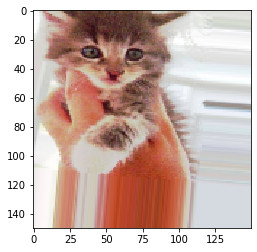

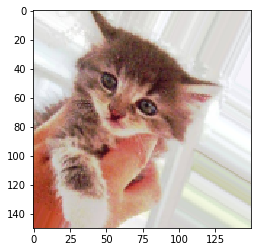

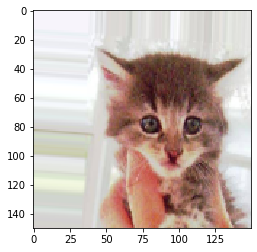

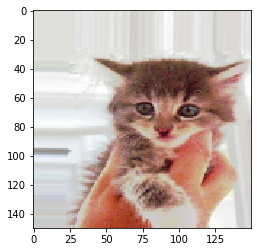

In [36]:
from keras.preprocessing import image #modulo con opciones para preprocesar imagenes

fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3] #elige una iamgen para aumentar

img = image.load_img(img_path, target_size=(150,150)) #lee y redimensiona la imagen

x = image.img_to_array(img) #convierte una matriz numpy con forma (150,150,3)

x = x.reshape((1,)+ x.shape) #la remodela a (1,150,150,3)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    
plt.show()

Para reducir más el sobreajuste vamos a añadir tb una capa Dropout al modelo, justo antes del clasificador densamente conectado.

**Entrenamos la convnet utilizando generadores de aumentos de datos y dropout**

In [37]:
train_datagen= ImageDataGenerator(
rescale=1./255, 
rotation_range=40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2, 
horizontal_flip = True,)

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir, #directorio objetivo
target_size = (150,150), #redimensiona las imágenes a 150x150
batch_size = 32,
class_mode = 'binary'
) #al usar pérdida binary_crossentropy, necesitamos etiquetas binarias

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size = 32,
class_mode = 'binary')

history = model.fit_generator(
train_generator, 
steps_per_epoch = 100,
epochs = 100,
validation_data = validation_generator,
validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 122s 1s/step - loss: 0.6619 - acc: 0.6888 - val_loss: 0.6036 - val_acc: 0.7164
Epoch 2/100
100/100 [==============================] - 131s 1s/step - loss: 0.5687 - acc: 0.7098 - val_loss: 0.3419 - val_acc: 0.7036
Epoch 3/100
100/100 [==============================] - 131s 1s/step - loss: 0.5384 - acc: 0.7241 - val_loss: 0.4433 - val_acc: 0.6891
Epoch 4/100
100/100 [==============================] - 128s 1s/step - loss: 0.5286 - acc: 0.7333 - val_loss: 0.5007 - val_acc: 0.7616
Epoch 5/100
100/100 [==============================] - 127s 1s/step - loss: 0.5319 - acc: 0.7346 - val_loss: 0.4805 - val_acc: 0.7430
Epoch 6/100
100/100 [==============================] - 129s 1s/step - loss: 0.5279 - acc: 0.7349 - val_loss: 0.4630 - val_acc: 0.7758
Epoch 7/100
100/100 [==============================] - 127s 1s/step - loss: 0.5108 - acc: 0.7396 - val_loss: 0.5

In [ ]:
#guardo el nuevo modelo
model.save('cats_and_dogs_small_2.h5')

**2.UTILIZAMOS UNA CONVNET PREENETRENADA**